In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn")

In [12]:
df = pd.read_csv("Wholesale/Wholesale customers data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [13]:
df.columns[2:]

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')

In [14]:
df["Revenue"] = df[df.columns[2:]].sum(axis=1)
minimum_revenue = df[df["Revenue"] == df["Revenue"].min()]

print(f"Der Laden mit dem geringsten Umsatz hat {minimum_revenue['Frozen'].values[0]} Frozen Produkte verkauft.\n")
minimum_revenue

Der Laden mit dem geringsten Umsatz hat 75 Frozen Produkte verkauft.



,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Revenue
154,1,3,622,55,137,75,7,8,904


<BarContainer object of 440 artists>

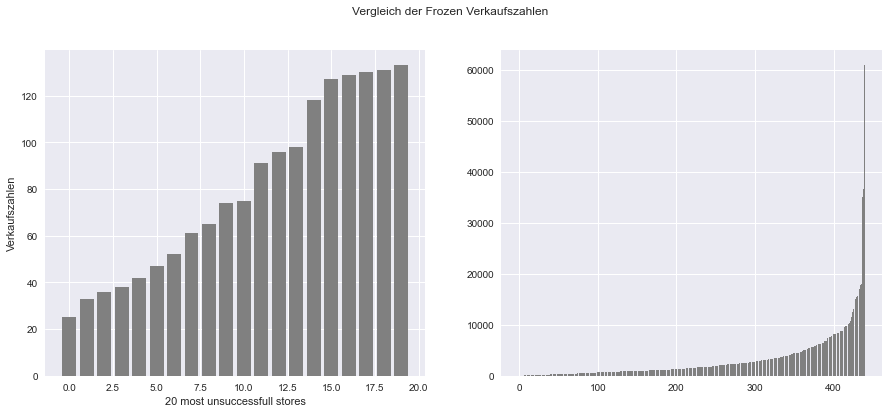

In [37]:
plt.figure(figsize=(15, 6))
plt.suptitle("Vergleich der Frozen Verkaufszahlen")

plt.subplot(121)
plt.bar(x=list(range(20)), height=df["Frozen"].sort_values()[:20], color="gray")
plt.ylabel("Verkaufszahlen")
plt.xlabel("20 most unsuccessfull stores")

plt.subplot(122)
plt.bar(x=list(range(len(df))), height=df["Frozen"].sort_values(), color="gray")

In [48]:
df2 = df.groupby("Region").mean()
errorbars = np.array([np.zeros(len(df2), df2["Frozen"].std())])
df2["Frozen"].std()

620.0631643967274

TypeError: 'numpy.ndarray' object is not callable

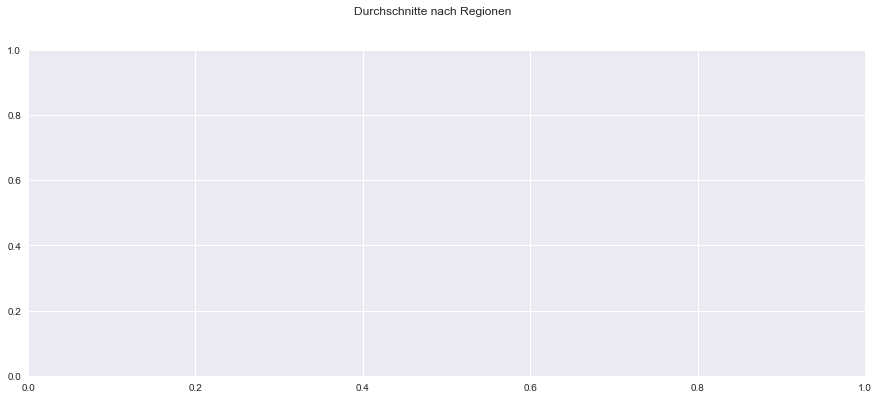

In [43]:
plt.figure(figsize=(15, 6))
plt.suptitle("Durchschnitte nach Regionen")

plt.subplot(111)
plt.bar(x=["Region 1", "Region 2", "Region 3"], height=df2.values(), yerr=errorbars, color="gray")


In [28]:
aggregated_cr = df.groupby(by=["Channel", "Region"]).sum()
aggregated_cr

Fresh     Milk  Grocery  Frozen  Detergents_Paper  \
Channel Region                                                        
1       1        761233   228342   237542  184512             56081   
        2        326215    64519   123074  160861             13516   
        3       2928269   735753   820101  771606            165990   
2       1         93600   194112   332495   46514            148055   
        2        138506   174625   310200   29271            159795   
        3       1032308  1153006  1675150  158886            724420   

                Delicassen  Revenue  
Channel Region                       
1       1            70632  1538342  
        2            30965   719150  
        3           320358  5742077  
2       1            33695   848471  
        2            23541   835938  
        3           191752  4935522

<AxesSubplot:xlabel='Channel,Region'>

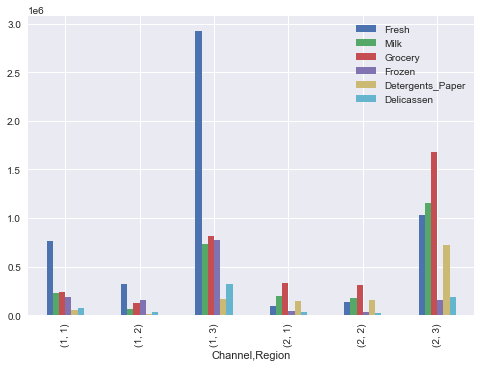

In [31]:
aggragated_cr_wr = aggregated_cr.drop(columns=["Revenue"], inplace=False)
aggragated_cr_wr.plot(kind="bar")

In [16]:
aggregated_c = aggregated_cr.groupby(by="Channel").sum()
aggregated_c.drop(columns=["Revenue"], inplace=True)
aggregated_c

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,,,,,,
1,4015717,1028614,1180717,1116979,235587,421955
2,1264414,1521743,2317845,234671,1032270,248988


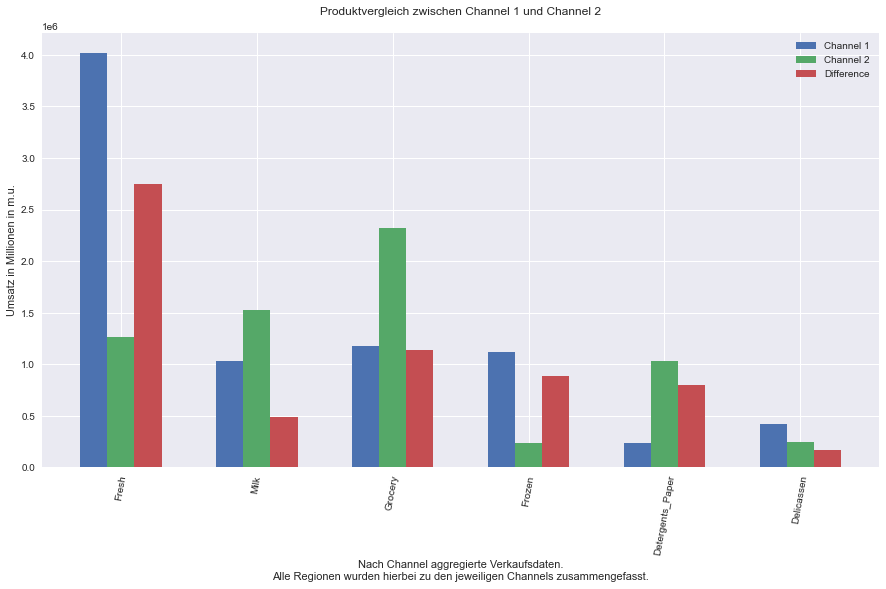

In [19]:
plt.figure(figsize=(15, 8))

plt.title("Produktvergleich zwischen Channel 1 und Channel 2\n")

idx = np.arange(len(aggregated_c.columns))
width = 0.2
plt.bar(x=idx, height=aggregated_c.iloc[0].values, width=width, label="Channel 1")
plt.bar(x=idx + 0.2, height=aggregated_c.iloc[1].values, width=width, label="Channel 2")
plt.bar(x=idx + 0.4, height=abs(aggregated_c.iloc[1].values - aggregated_c.iloc[0].values), width=width, label="Difference")

plt.xticks(idx + (width + 0.2) / 2, aggregated_c.columns, rotation=80)
plt.xlabel("Nach Channel aggregierte Verkaufsdaten.\nAlle Regionen wurden hierbei zu den jeweiligen Channels zusammengefasst.")
plt.ylabel("Umsatz in Millionen in m.u.")


plt.legend()
plt.show()